# Bank Customer Churn Prediction

In [91]:
# Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.cm import rainbow
import sklearn
import seaborn as sns
import warnings

import pandas_profiling as pp

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from IPython.display import display
warnings.filterwarnings('ignore')

from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 13, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

np.random.seed(123)


In [92]:
# Load Dataset

data = pd.read_csv('Bank Customer Churn Prediction.csv', index_col=0)

In [93]:
data 

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


## Exploratory Data Analysis

In [95]:
# Create list of features
features_list = data.keys().drop('churn')
features_list

# Check central tendencies, grouped by churn, does anything jump out?
data.groupby('churn')[features_list].mean().style.background_gradient(cmap = "Blues")

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
churn,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


From the above, only a slight difference in credit score results in churning with lower scores leading to churns. The average age of 44 yrs is most likely to churn while tunure below 5 has the same effect. Insterestingly, the higher estimated salary (above 100k) is most likely to churn. 

I have not accounted for outliers that can skew the results and initial analysis. Thus is this not a final analytical result. 

In [96]:
# Check central tendencies, grouped by churn, does anything jump out?
data.groupby('churn')[features_list].median().style.background_gradient(cmap = "Blues")

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
churn,,,,,,,,
0,653,36,5,92072.680000,2,1,1,99645.040000
1,646,45,5,109349.290000,1,1,0,102460.840000


The median presents similar results as the mean hence confirming the likelihood of no outliers in the data. 

In [50]:
# data profiling
import pandas_profiling

pandas_profiling.ProfileReport(data)

## Encoding Categorical Values

In [97]:
# Encode the categorical variables
for column in data.select_dtypes(include='object').columns:
    data[column] = data[column].astype('category').cat.codes

#### EDA Continued

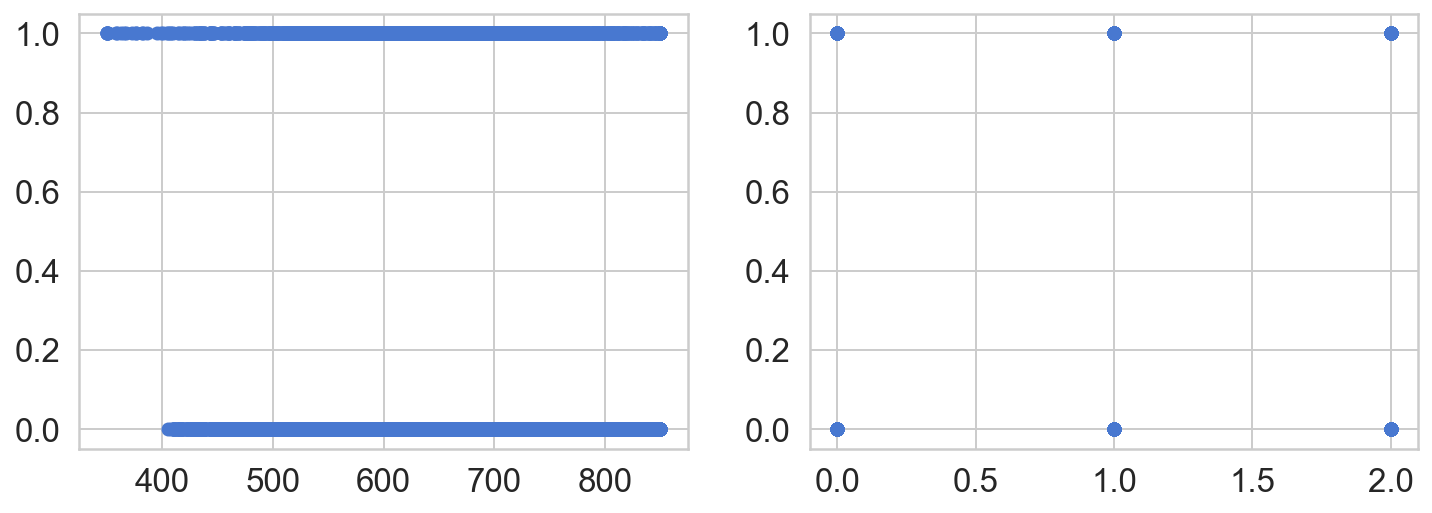

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Single out a couple of predictor variables and labels ('SalePrice' is our target label set)
x = data[['credit_score', 'country','gender','age','tenure','balance','products_number',
          'credit_card','active_member','estimated_salary']].values
y = data['churn'].values

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

ax[0].scatter(x[:,0], y)
ax[1].scatter(x[:,1], y)

plt.show()

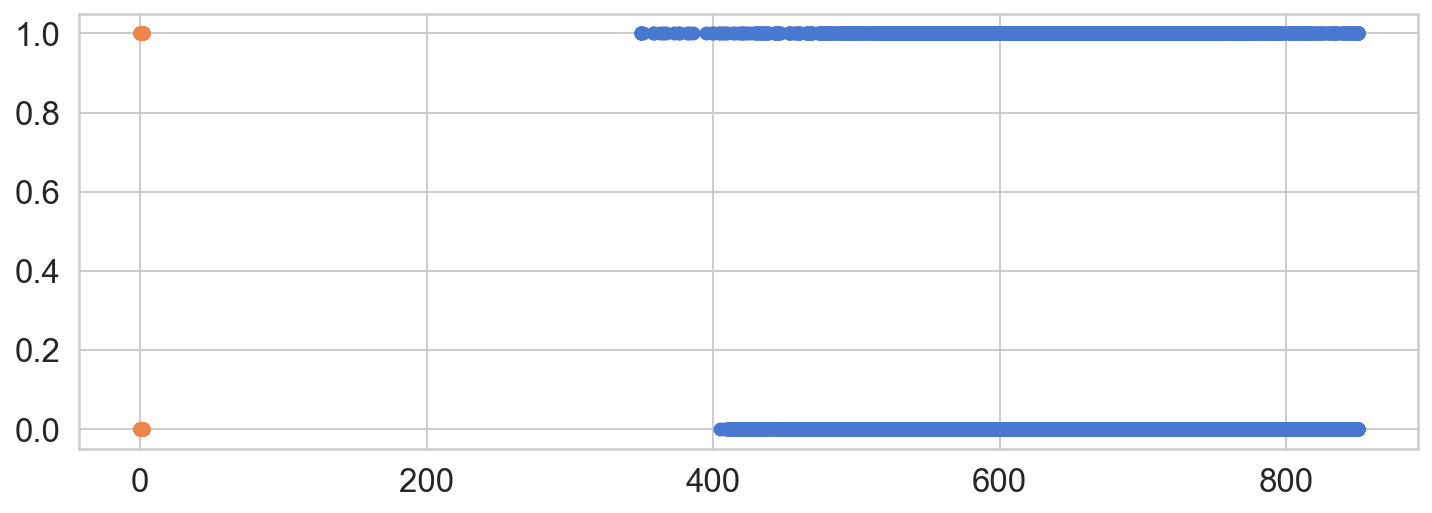

In [99]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.scatter(x[:,0], y)
ax.scatter(x[:,1], y)

(array([5014.,    0.,    0.,    0.,    0., 2509.,    0.,    0.,    0.,
        2477.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

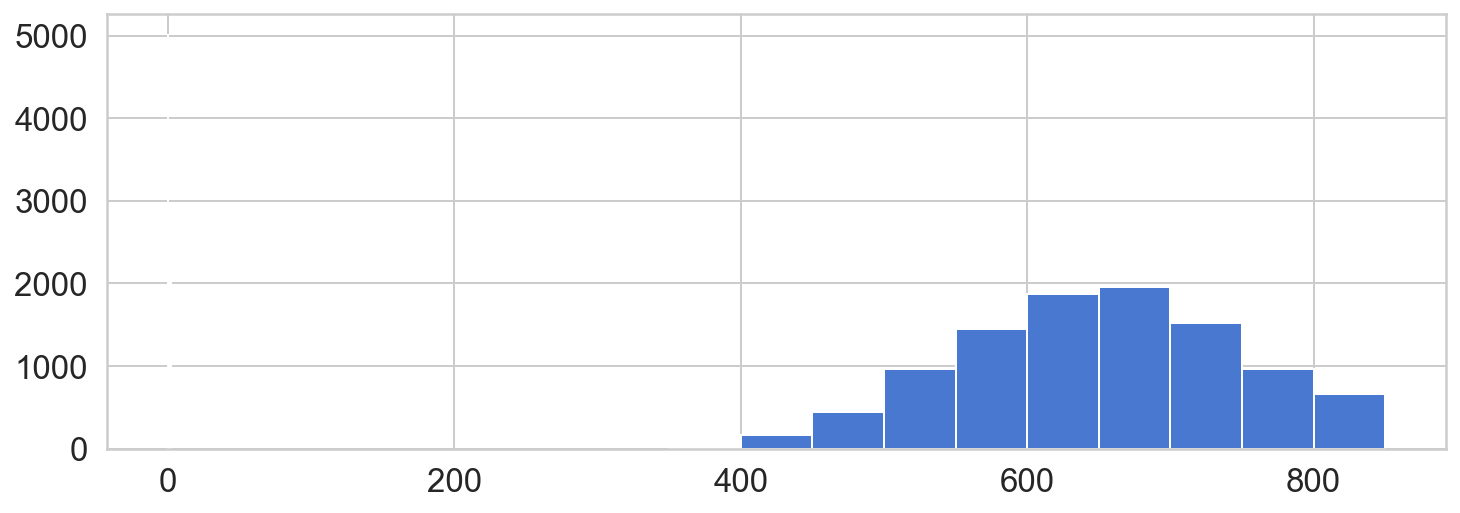

In [100]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.hist(x[:,0])
ax.hist(x[:,1])

# FEATURE SCALING

## 1. StandardScaler

(array([5014.,    0.,    0.,    0.,    0., 2509.,    0.,    0.,    0.,
        2477.]),
 array([-0.90188624, -0.66019088, -0.41849552, -0.17680016,  0.0648952 ,
         0.30659057,  0.54828593,  0.78998129,  1.03167665,  1.27337201,
         1.51506738]),
 <BarContainer object of 10 artists>)

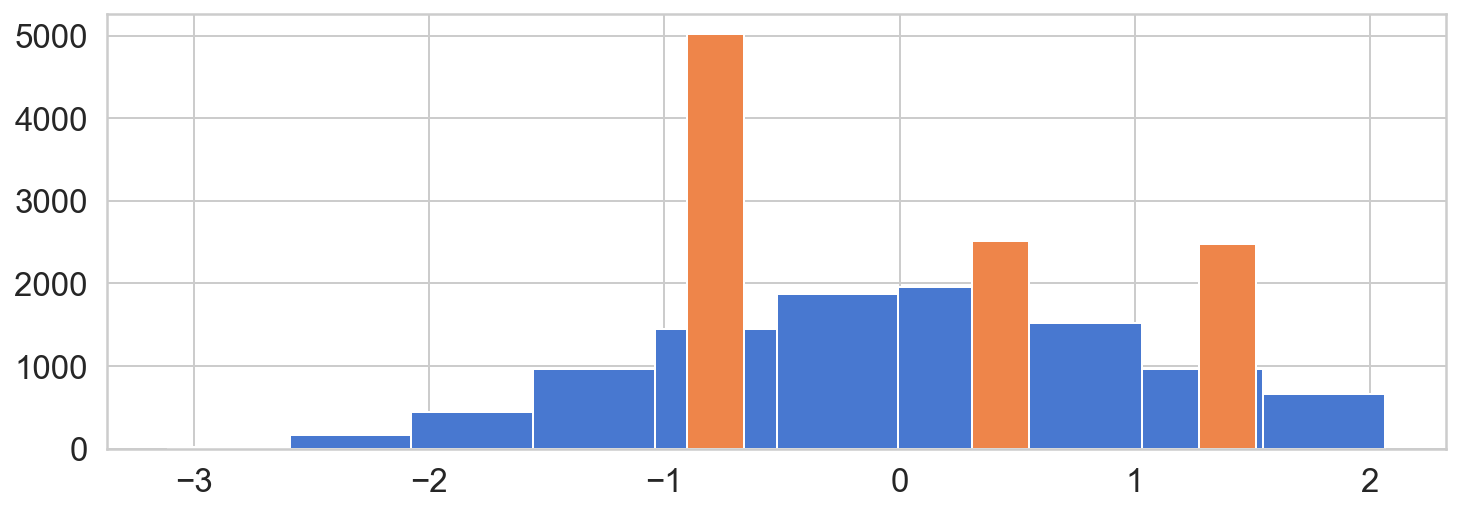

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

fig, ax = plt.subplots(figsize=(12, 4))

scaler = StandardScaler()
x_std = scaler.fit_transform(x)

ax.hist(x_std[:,0])
ax.hist(x_std[:,1])

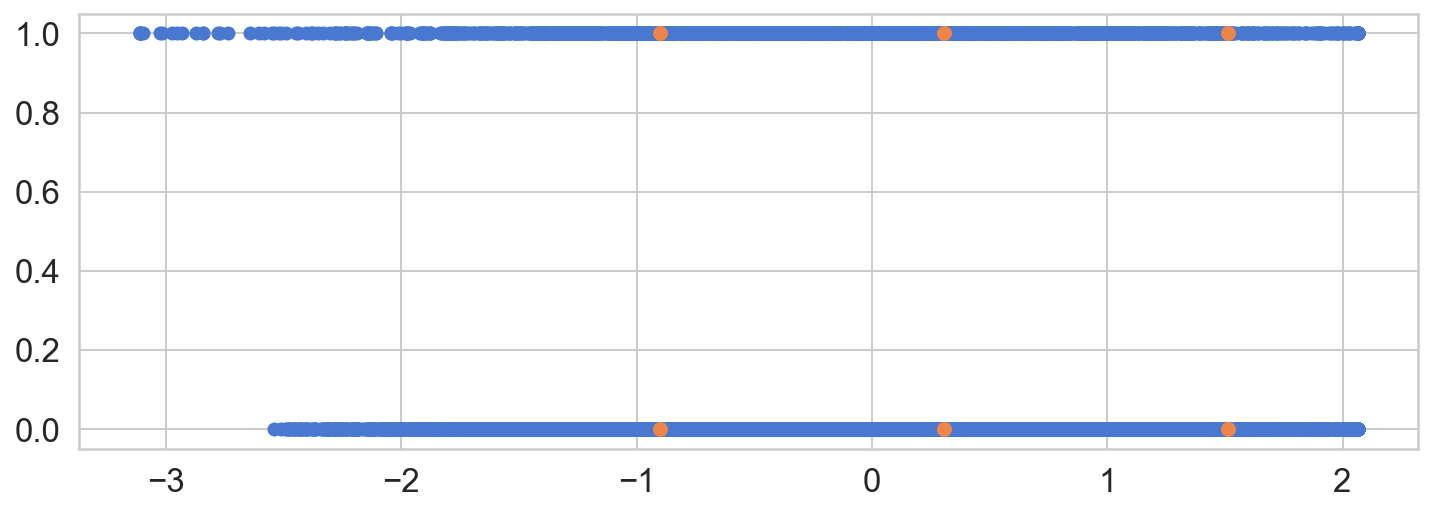

In [56]:
fig, ax = plt.subplots(figsize=(12, 4))

scaler = StandardScaler()
x_std = scaler.fit_transform(x)

ax.scatter(x_std[:,0], y)
ax.scatter(x_std[:,1], y)

In [57]:
data

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,,,,,,,,,,,
15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0
15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1


### FEATURE SCALING

In [71]:
from sklearn.preprocessing import StandardScaler

# Split the data into features and target
features = data.drop('churn', axis=1)
target = data['churn']

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


# Save the scaled features
pd.DataFrame(features_scaled).to_csv('features_scaled.csv', index=False)

In [61]:
features_scaled

array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

# Prediction

In [66]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.25)

# Split the data into features and target variable
#X = data.drop('satisfaction', axis=1)
#y = data['satisfaction']

# Create a StandardScaler object
scaler = StandardScaler()

# Create a LogisticRegression object
logreg = LogisticRegression()

# Create a Pipeline object
pipeline = Pipeline([('scaler', scaler), ('logreg', logreg)])

# Fit the pipeline to the train data
pipeline.fit(X_train, y_train)

# Get the predictions from the pipeline
y_pred = pipeline.predict(X_test)

# Evaluate the pipeline
print('Accuracy:', pipeline.score(X_test, y_test))

Accuracy: 0.818


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,,,,,,,,,,,
15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0
15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1
